# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [226]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [227]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

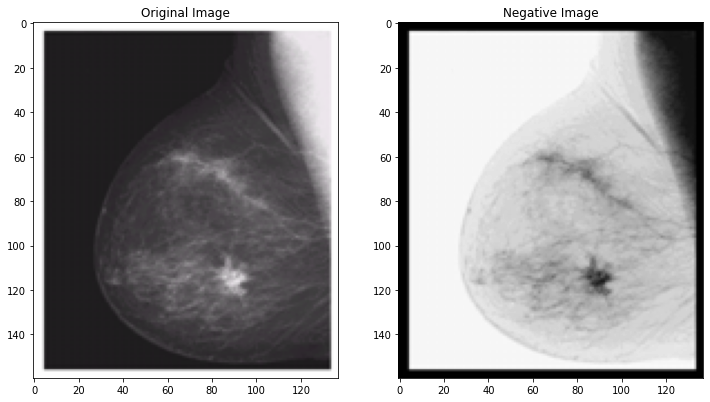

In [228]:
'''
1
Negative Transformation
'''
def negative(image, imageSize=256): 
    negativeImage = np.array(image).flatten()
    # negativeImage = np.array([((imageSize - 1) - val) for val in negativeImage])
    # acts as a generator, yield one element at time, doesn't generate the whole list as the normal list comperhension
    negativeImage = np.fromiter((((imageSize - 1) - val) for val in negativeImage),dtype=negativeImage.dtype)
    negativeImage = negativeImage.reshape(image.shape)
    return negativeImage

image = io.imread('imgs/Picture1.png') # png image with alpha channel
show_images([image, negative(image[:,:,0])],
            ['Original Image', 'Negative Image'])



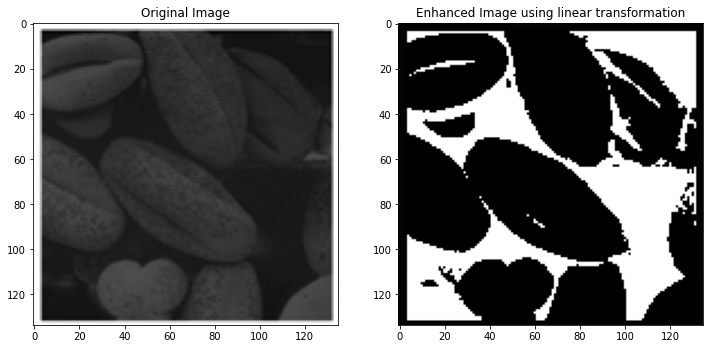

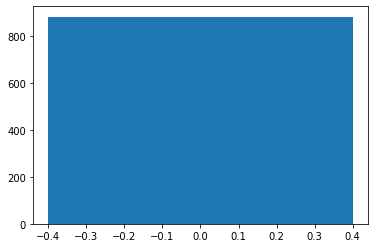

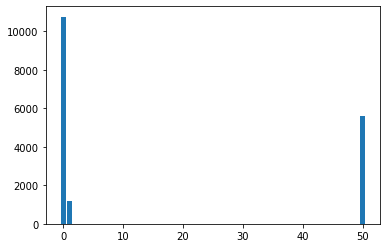

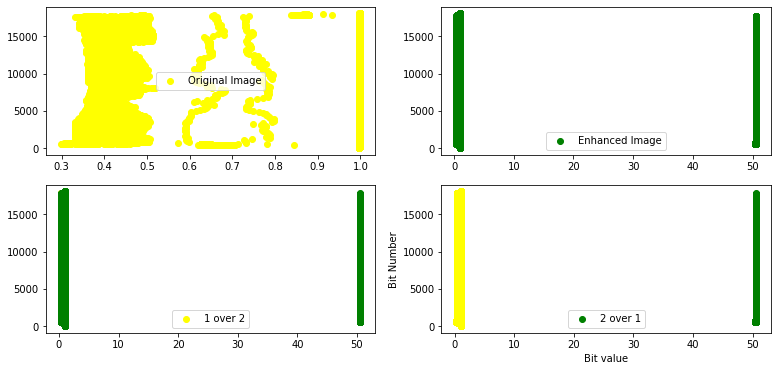

In [233]:
'''
2
Contrast Enhancement
'''
def comparePlotImage(image1, image2):
    plt.ion()
    fig = plt.figure(figsize=(13,6)) # creating a plot
    
    ax = fig.add_subplot(221) # plotting a plot
    ax.scatter(image1.flatten(), range(len(image1.flatten())), color = 'yellow')   
    ax.legend(["Original Image"])

    bx = fig.add_subplot(222)
    bx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')   
    bx.legend(["Enhanced Image"])

    cx = fig.add_subplot(223)
    cx.scatter(image1.flatten(), range(len(image1.flatten())), color = 'yellow')    
    cx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')  
    cx.legend(["1 over 2"])

    dx = fig.add_subplot(224)
    dx.scatter(image2.flatten(), range(len(image2.flatten())), color = 'green')   
    dx.scatter(image1.flatten(),range(len(image1.flatten())), color = 'yellow')   
    dx.legend(["2 over 1"])

    plt.ylabel('Bit Number')
    plt.xlabel('Bit value')
    plt.show() # show plot

    
# 50 + (150 * float(val/100))
def contrastEnhance(image): 
    enhancedImage = np.array(image).flatten()
    # acts as a generator, yield one element at time, doesn't generate the whole list as the normal list comperhension
    enhancedImage = np.fromiter(((50 + (150 * float(val * 255/100))/255 if (val>=0 and val <=100/255) else val) for val in enhancedImage),dtype=enhancedImage.dtype)
    enhancedImage = enhancedImage.reshape(image.shape)
    return enhancedImage



image = rgb2gray(rgba2rgb(io.imread('imgs/Picture2.png'))) # png image with alpha channel
show_images([image, contrastEnhance(image)],
            ['Original Image',  'Enhanced Image using linear transformation'])


showHist(image), showHist(contrastEnhance(image))
comparePlotImage(image, contrastEnhance(image))




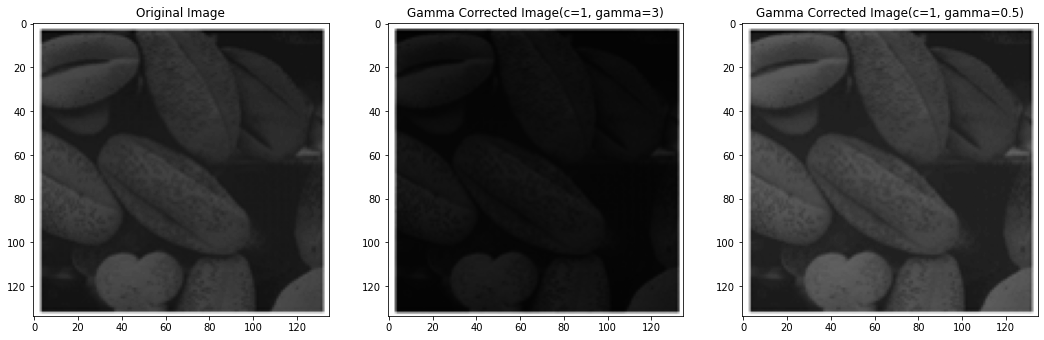

In [235]:
'''
3
Gamma Correction
What is the effect of decreasing 𝛾
'''
def gammaCorrection(image,c, gamma): 
    gammaImage = np.array(image).flatten()
    gammaImage = np.fromiter(((c * val**gamma) for val in gammaImage),dtype=gammaImage.dtype)
    gammaImage = gammaImage.reshape(image.shape)
    return gammaImage

image = rgb2gray(rgba2rgb(io.imread('imgs/Picture2.png'))) # png image with alpha channel
show_images([image, gammaCorrection(image, c=1, gamma=3), gammaCorrection(image, c=1, gamma=0.5)],
            ['Original Image', 'Gamma Corrected Image(c=1, gamma=3)', 'Gamma Corrected Image(c=1, gamma=0.5)'])



0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
0.0, 0.0
2.0, 2.86368843069874e-05
40.0, 0.000572737686139748
38.0, 0.0005441008018327606
389.0, 0.005569873997709049
1634.0, 0.023396334478808706
1245.0, 0.017826460481099655
1518.0, 0.021735395189003436
1518.0, 0.021735395189003436
3628.0, 0.051947308132875146
6774.0, 0.09699312714776633
5187.0, 0.07426975945017182
2041.0, 0.02922394043528064
1601.

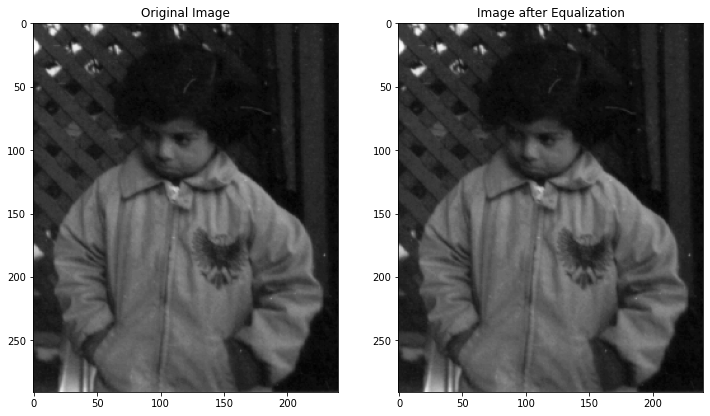

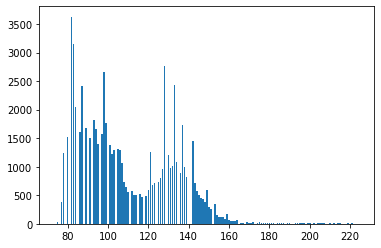

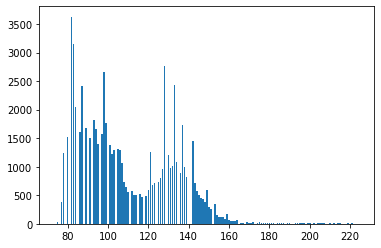

In [244]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name):
    
    # read image and get its parameters
    image = np.array(io.imread('imgs/' + name + '.tif'))
    flattenedImage = image.reshape(image.shape[0] * image.shape[1]) # flatten the image to increase performance 
    
    N, M = image.shape
    G = len([val for val in flattenedImage if val > 0])

    # Calculate the histogram of gray-levels for the image
    H = np.zeros(G)    
    for val in flattenedImage:
        H[val] +=1
    # for h in H:
    #     print(h)
    # Form the cumulative image histogram, H_c
    H_c = np.zeros(G)
    for i in range(1, G):
        H_c[i] = (H[i-1] + H[i])

    # for h in H_c:
    #     print(h)
    # iterate over the image pixel-by-pixel and write an output image with the gray-levels using the mapping formula
    for p in flattenedImage:
        print(p, end=", ")
        p = round((G - 1) * H_c[p] / (N * M))
        print(p)
    
    flattenedImage.resize(image.shape) # return the image into its original size

    # Show the output
    show_images([image,flattenedImage],
            ['Original Image',  'Image after Equalization'])
    showHist(image) 
    showHist(flattenedImage) 

getImageWithHist("pout")
# getImageWithHist("tire")